<a href="https://colab.research.google.com/github/Mhoover41/Stroke-Prediction/blob/main/Stroke_Prediction_Project_2_Melissa_Hoover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Stroke Prediction**


- **Author:** Melissa Hoover

#**Project Overview**

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Data Source:  https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Data Link: [healthcare-dataset-stroke-data.csv](https://github.com/Mhoover41/Stroke-Prediction/files/11501796/healthcare-dataset-stroke-data.csv)

##Data Dictionary

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

**Note:** "Unknown" in smoking_status means that the information is unavailable for this patient

#**Load and Inspect Data**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##### **Imports**

In [38]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
#Seaborn
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer

# Models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics

from sklearn.metrics import (ConfusionMatrixDisplay, 
                             PrecisionRecallDisplay,  
                             f1_score, accuracy_score, precision_score,
                             recall_score, classification_report)

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

##### **Loading Data**

In [3]:
#Load the data file
filename= '/content/drive/MyDrive/Project 2/healthcare-dataset-stroke-data.csv'
df= pd.read_csv(filename)

**Inspecting Data**

In [4]:
# Display the first 5 rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


  How many Rows/Columns:

In [5]:
# Display the number of rows and columns
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


##### **Display Column Names, Count of Non-Null Values, and Data Types**

In [6]:
# Display index, columns, null count, and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


- An age of .08 doesn't make sense we will explore this later.

#**Clean Data**

   

Checking the data types:

In [9]:
# Display data types
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

- The dataset has a combination of categorical (object) and numeric (float and int) data types.
- No mismatched data types were found.

Identifying missing values:

In [10]:
#Display total number of missing values
missing_values= df.isna().sum().sum()
print(f"Total number of missing values is {missing_values}")

Total number of missing values is 201


In [11]:
# Display the count of missing values for each column
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [12]:
# Display the percentage of missing values for each column
df.isna().sum()/len(df) * 100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

There are 3.9% missing values in bmi column.  This will be imputed with SimpleImputer in our preprocessing steps. 

Checking for Duplicates:

In [13]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


Drop Unnecessary Columns:

In [17]:
#Drop column
df.drop(columns = ['id'], inplace=True)

In [18]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- I have confirmed the 'id' column is now dropped.

##Numerical Columns
- Check for inconsistencies in all columns that are Integer or Float data types
- Check for unusual or impossible values.
- Check for Outliers

In [20]:
#View summary statistics
df.describe(include='number')

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- The only unusual values I see are for the age, lets investigate further.   

### Age Column

In [18]:
df['age'].value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

- There are some floats we need to convert to whole numbers. 

In [21]:
df['age'] = df['age'].round(0)

In [22]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
10.0     35
4.0      34
7.0      32
6.0      24
0.0      20
Name: age, Length: 83, dtype: int64

I can see we now have 20 ages that are 0, lets round those up to 1. 

In [23]:
df['age'] = df['age'].replace(0, 1)

In [24]:
df['age'].value_counts()

78.0    102
57.0     95
2.0      90
52.0     90
54.0     87
       ... 
11.0     36
10.0     35
4.0      34
7.0      32
6.0      24
Name: age, Length: 82, dtype: int64

In [25]:
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

- We now have a minimum age of 1 and a maximum age of 82

### Hypertension Column

In [29]:
df['hypertension'].unique()

array([0, 1])

### Heart Disease Column

In [30]:
df['heart_disease'].unique()

array([1, 0])

### Average Glucose Level Column

In [32]:
df['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

### BMI Column

In [33]:
df['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

### Stroke Column

In [34]:
df['stroke'].unique()

array([1, 0])

## Categorical Columns
- Check for inconsistencies in all columns that are object data types


In [35]:
#View Summary Statistics for Object data types
df.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [26]:
from scipy.sparse import data
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == 'object')]
# Display the series of object datatypes
object_data_types

gender            object
ever_married      object
work_type         object
Residence_type    object
smoking_status    object
dtype: object

In [27]:
## Display the index of object datatypes
object_data_types.index

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')

In [28]:
## Loop through the object datatype columns
for column in object_data_types.index:
    ## Print the column name
    print(column)
    ## Print the unique values from the column
    print(df[column].unique())
    ## Print a blank row
    print('\n')

gender
['Male' 'Female' 'Other']


ever_married
['Yes' 'No']


work_type
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


Residence_type
['Urban' 'Rural']


smoking_status
['formerly smoked' 'never smoked' 'smokes' 'Unknown']




- No inconsistencies noted

# **Exploratory Data Analysis**

##Numerical Columns



- For each numeric column, we will visualize the distribution with a histogram

### Age Column

In [36]:
#Display the descriptive statistics for the column
df['age'].describe()

count    5110.000000
mean       43.230528
std        22.605333
min         1.000000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

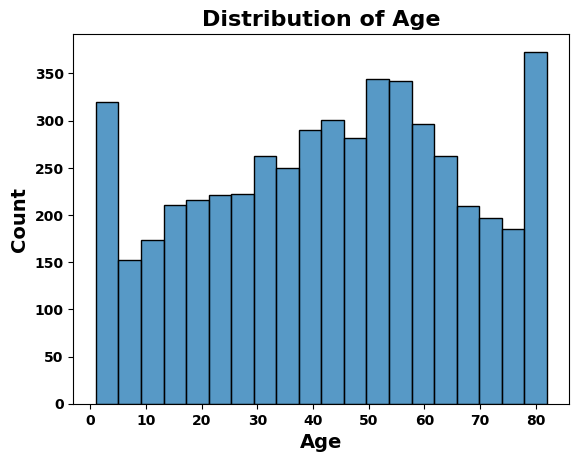

In [39]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='age')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Age', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of Age', fontsize=16, weight='bold');

- Age Boxplot

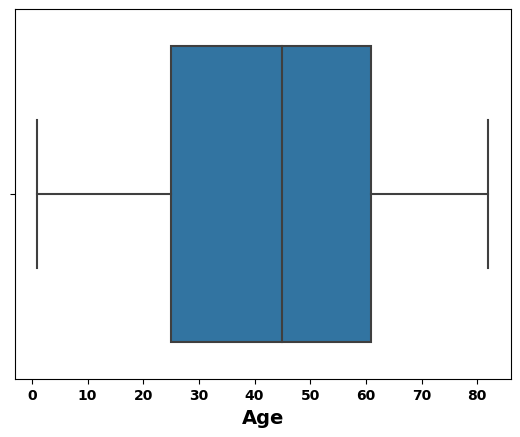

In [40]:
## Define a MatplotLib ax object using seaborn.boxplot()
# Use x = for horizontal
ax = sns.boxplot(data = df,
                 x = 'age')
ax.set_xlabel('Age', fontsize=14, weight='bold')
plt.xticks(fontsize=10, weight='bold');


- There are no outliers and the median Age is 45.

###Hypertension Column

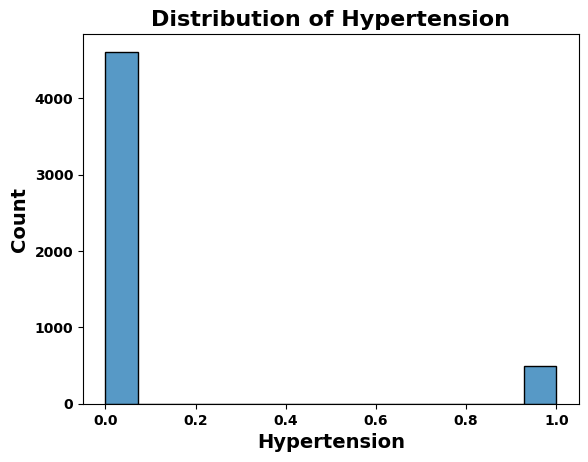

In [41]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='hypertension')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Hypertension', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of Hypertension', fontsize=16, weight='bold');

 - Where 0 indicates does not have hypertension and 1 indicates they do.  The majority do not have hypertension. 

### Heart Disease Column

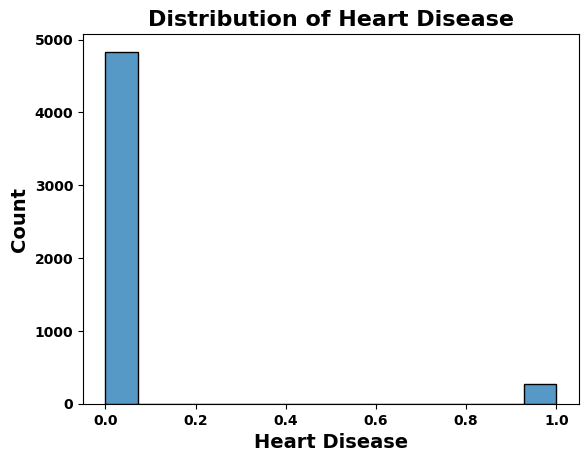

In [49]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='heart_disease')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Heart Disease', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of Heart Disease', fontsize=16, weight='bold');

Where 0 indicates does not have heart disease and 1 indicates they do. The majority do not have heart disease.

### Average Glucose Level

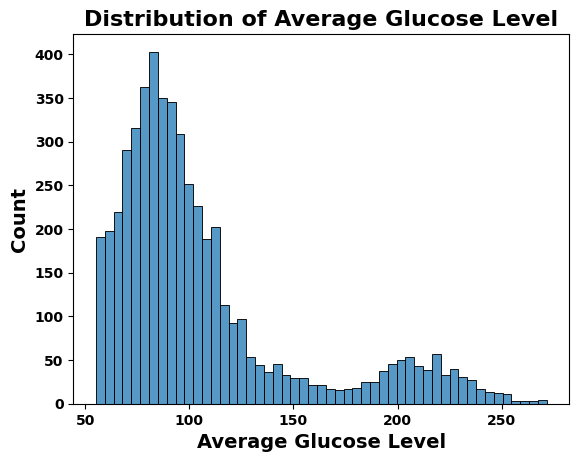

In [54]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='avg_glucose_level')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Average Glucose Level', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of Average Glucose Level', fontsize=16, weight='bold');

- The maximum average glucose level is 270 where most people had an average glucose level of under 100.  

### BMI Column

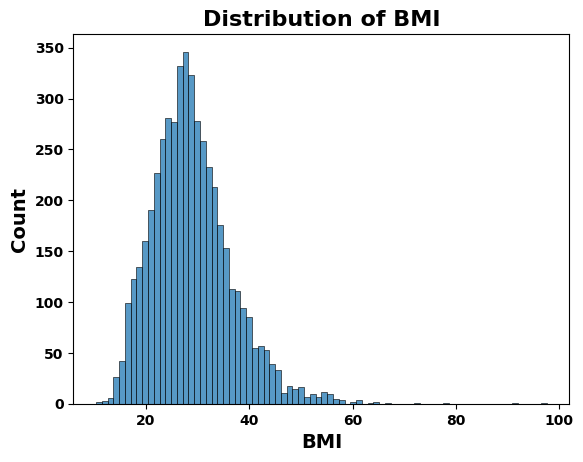

In [55]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='bmi')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('BMI', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of BMI', fontsize=16, weight='bold');

- The mean and median BMI were 28. 

### Stroke Column

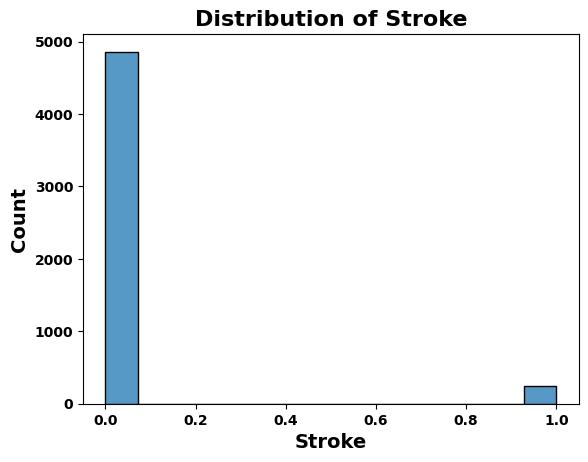

In [48]:
## Define a MatplotLib ax object using seaborn.histplot()
## Default Bins = 'auto'
ax = sns.histplot(data=df,
                  x='stroke')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Stroke', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
# Add a title
ax.set_title('Distribution of Stroke', fontsize=16, weight='bold');

- We can see this is a very unbalanced dataset with most showing 0 which is no stroke. 

##Categorical Columns

- For each categorical column we will display the value counts, descriptive statistics, and a bar plot to visualize the data.

###Gender Column

In [56]:
#Display the value counts for the column
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [57]:
#Display the normalized value counts for the column
df['gender'].value_counts(normalize = True)

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

In [58]:
#Display the descriptive statistics for the column
df['gender'].describe()

count       5110
unique         3
top       Female
freq        2994
Name: gender, dtype: object

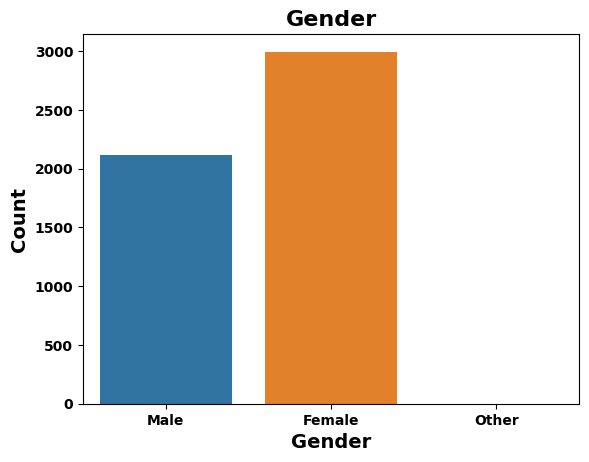

In [59]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='gender')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Gender', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
## Set the Title
ax.set_title('Gender', fontsize=16, weight='bold');

- Most are Female and we only had 1 person listed as "other".

### Ever Married Column

In [60]:
#Display the value counts for the column
df['ever_married'].value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [61]:
#Display the normalized value counts for the column
df['ever_married'].value_counts(normalize = True)

Yes    0.656164
No     0.343836
Name: ever_married, dtype: float64

In [62]:
#Display the descriptive statistics for the column
df['ever_married'].describe()

count     5110
unique       2
top        Yes
freq      3353
Name: ever_married, dtype: object

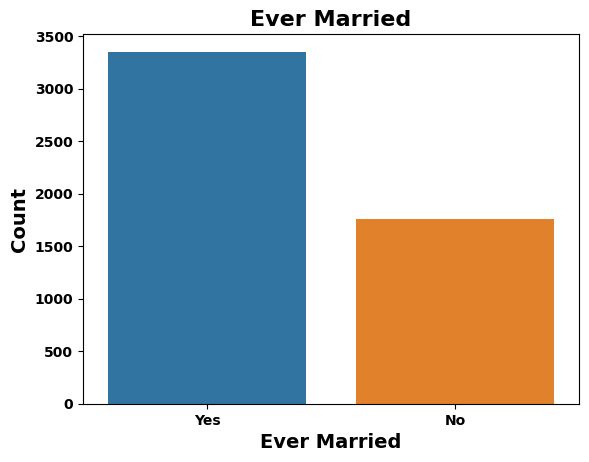

In [63]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='ever_married')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Ever Married', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
## Set the Title
ax.set_title('Ever Married', fontsize=16, weight='bold');

### Work Type Column

In [65]:
#Display the value counts for the column
df['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [66]:
#Display the normalized value counts for the column
df['work_type'].value_counts(normalize = True)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

In [67]:
#Display the descriptive statistics for the column
df['work_type'].describe()

count        5110
unique          5
top       Private
freq         2925
Name: work_type, dtype: object

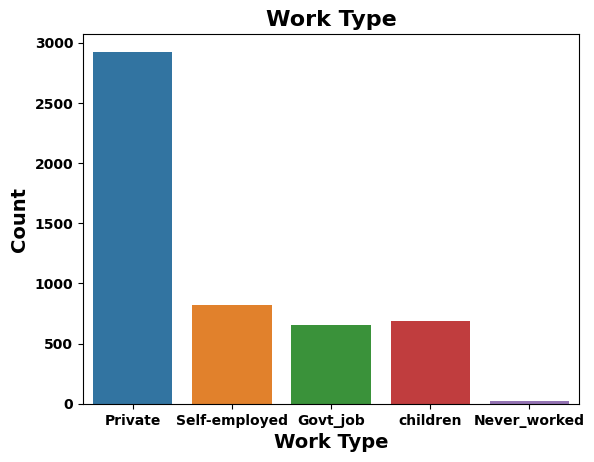

In [68]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='work_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Work Type', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
## Set the Title
ax.set_title('Work Type', fontsize=16, weight='bold');

 - The majority of people have a Private work type

### Residence Type Column

In [73]:
#Display the value counts for the column
df['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [72]:
#Display the normalized value counts for the column
df['Residence_type'].value_counts(normalize = True)

Urban    0.508023
Rural    0.491977
Name: Residence_type, dtype: float64

In [70]:
#Display the descriptive statistics for the column
df['Residence_type'].describe()

count      5110
unique        2
top       Urban
freq       2596
Name: Residence_type, dtype: object

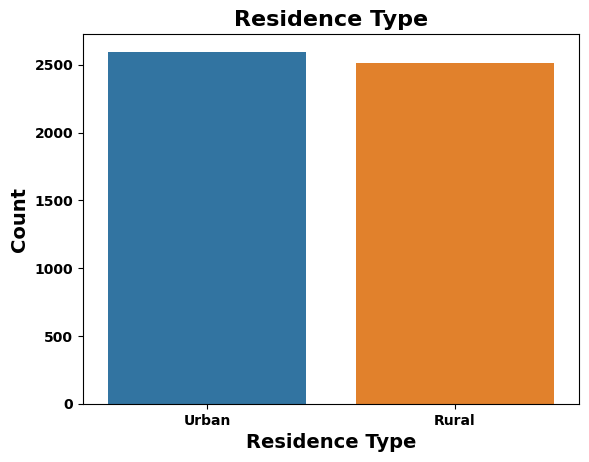

In [71]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='Residence_type')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Residence Type', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
## Set the Title
ax.set_title('Residence Type', fontsize=16, weight='bold');

- These are split fairly evenly with Urban being slightly higher.

### Smoking Status Column

In [74]:
#Display the value counts for the column
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [75]:
#Display the normalized value counts for the column
df['smoking_status'].value_counts(normalize = True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

In [76]:
#Display the descriptive statistics for the column
df['smoking_status'].describe()

count             5110
unique               4
top       never smoked
freq              1892
Name: smoking_status, dtype: object

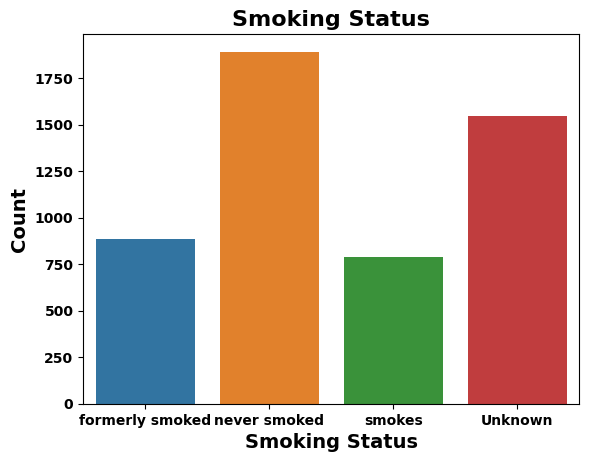

In [69]:
## Define a MatplotLib ax object using seaborn.countplot()
ax = sns.countplot(data=df,
                   x='smoking_status')
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
# Set Axes Labels
ax.set_xlabel('Smoking Status', fontsize=14, weight='bold')
ax.set_ylabel('Count', fontsize=14, weight='bold')
## Set the Title
ax.set_title('Smoking Status', fontsize=16, weight='bold');

- The majority have never smoked

##Heatmap of the correlation between features.

<ipython-input-64-ec41a76270d5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


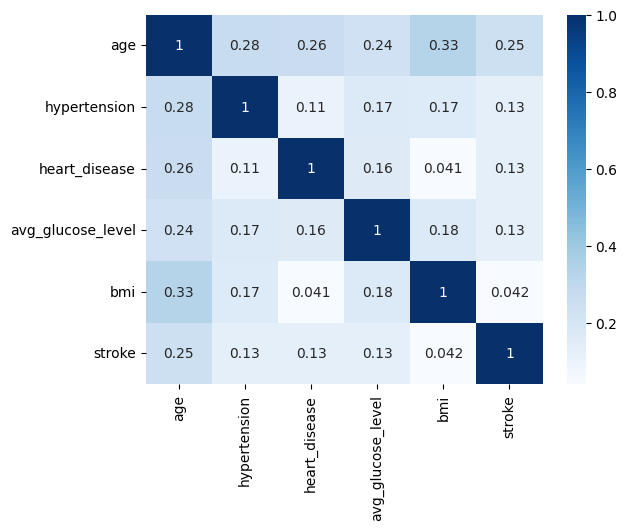

In [64]:
figsize= (20, 10)
corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True) ;

- Age has the highest correlation to Stroke.

#**Explanatory Data Analysis**


# Preprocessing for Machine Learning

##Identify each feature as ordinal, numerical, or nominal 


- ordinal features = none
- numeric features = age, hypertension, heart disease, average glucose level, bmi, stroke
- Nomimal features= gender, ever married, work type, residence type, smoking status





##Drop Duplicates and Fix Inconsistencies in Categorical Data

##Define features (X) and target (y)

- Target: Stroke (0= no and 1= yes)
- Features: the remaining of the columns 

In [ ]:
#Defining my Target variable which is y and the remaining features X
X = df.drop(columns = ['stroke'])
y = df['stroke']

#Train Test Split

#Prepare the Data

##Instantiate Column Selectors

##Instantiate Transformers

##Instantiate Pipelines

##Instantiate Column Transformer

##Fit and Transform Data

##Inspect Preprocessed Data

##Convert Preprocessed Array to Dataframes